# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [24]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [25]:
# loading the data: Wholesale customers data
sales = pd.read_csv(r'C:\Users\smont\Documents\first_repo\Labs\lab-unsupervised-learning-es\data\Wholesale customers data.csv')

sales.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

TOTAL NUMBER OF ROWS: 
 440 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

NUMBER OF UNIQUE VALUES:
 Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES:
 Channel              0.45
Region               0.68
Fresh               98.41
Milk                95.68
Grocery             97.73
Frozen              96.82
Detergents_Paper    94.77
Delicassen          91.59
dtype: float64 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

% OF NAN VALUES IS: 
 Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64 %

- 

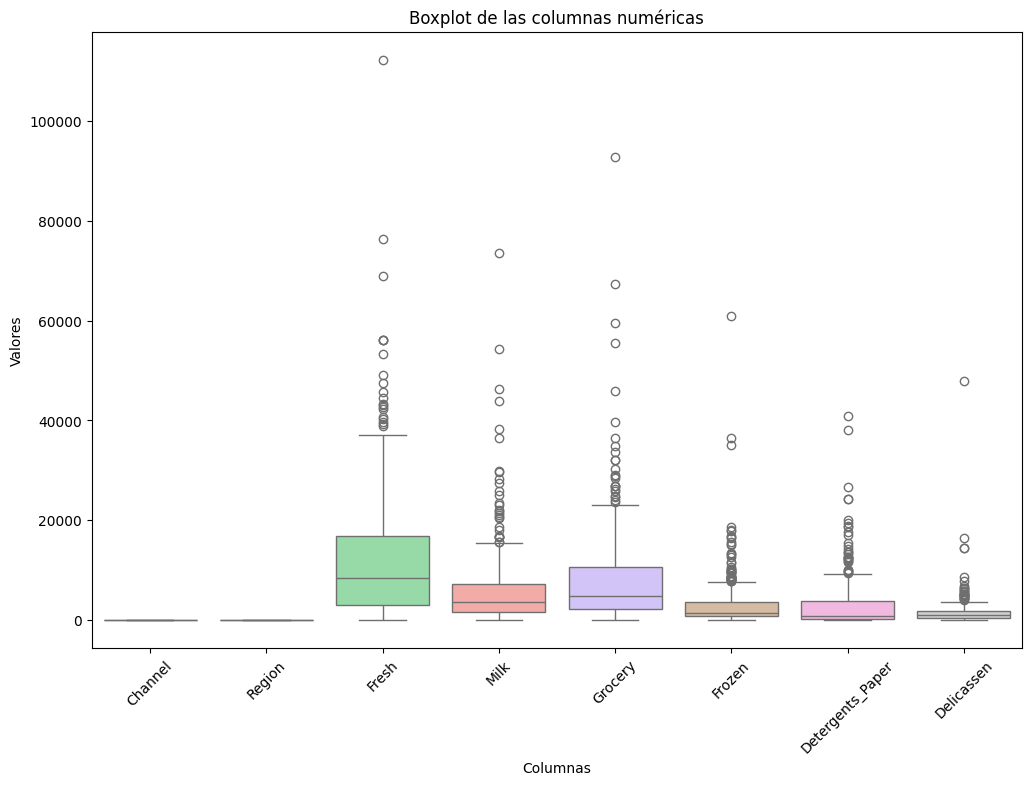

In [26]:
# Your code here:
x = sales

# Análisis de calidad de la base de datos
print("TOTAL NUMBER OF ROWS: \n",len(x),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n")
print("NUMBER OF UNIQUE VALUES:\n",x.nunique(),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES:\n",round((x.nunique()/len(x)*100),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("% OF NAN VALUES IS: \n",round(100*(x.isnull().sum() / len(x)),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")

print(x.describe())

# Seleccionar solo las columnas numéricas
numeric_columns = x.select_dtypes(include='number')

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns, palette='pastel')

# Personalizar el gráfico
plt.title("Boxplot de las columnas numéricas")
plt.ylabel("Valores")
plt.xlabel("Columnas")
plt.xticks(rotation=45)  # Rotar los nombres de las columnas para facilitar lectura
plt.show()

# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [27]:
# Función para eliminar Outliers
# def remove_outliers(x, column):
#     Q1 = x[column].quantile(0.25)  # Primer cuartil
#     Q3 = x[column].quantile(0.75)  # Tercer cuartil
#     IQR = Q3 - Q1  # Rango intercuartil
#     lower_bound = Q1 - 1.5 * IQR  # Límite inferior
#     upper_bound = Q3 + 1.5 * IQR  # Límite superior

#     # Filtrar datos dentro de los límites
#     return x[(x[column] >= lower_bound) & (x[column] <= upper_bound)]

DataFrame sin outliers:
       Channel    Region      Fresh      Milk    Grocery    Frozen  \
0    0.693147  1.098612   9.446913  9.175335   8.930759  5.365976   
1    0.693147  1.098612   8.861775  9.191158   9.166179  7.474205   
2    0.693147  1.098612   8.756682  9.083416   8.946896  7.785305   
3    0.000000  1.098612   9.492884  7.086738   8.347827  8.764678   
4    0.693147  1.098612  10.026369  8.596004   8.881558  8.272571   
..        ...       ...        ...       ...        ...       ...   
435  0.000000  1.098612  10.299003  9.396903   9.682030  9.483036   
436  0.000000  1.098612  10.577146  7.266129   6.638568  8.414052   
437  0.693147  1.098612   9.584040  9.647821  10.317020  6.079933   
438  0.000000  1.098612   9.238928  7.591357   7.710653  6.945051   
439  0.000000  1.098612   7.932721  7.437206   7.828038  4.174387   

     Detergents_Paper  Delicassen  
0            7.891331    7.198931  
1            8.099554    7.482119  
2            8.165079    8.967504  
3 

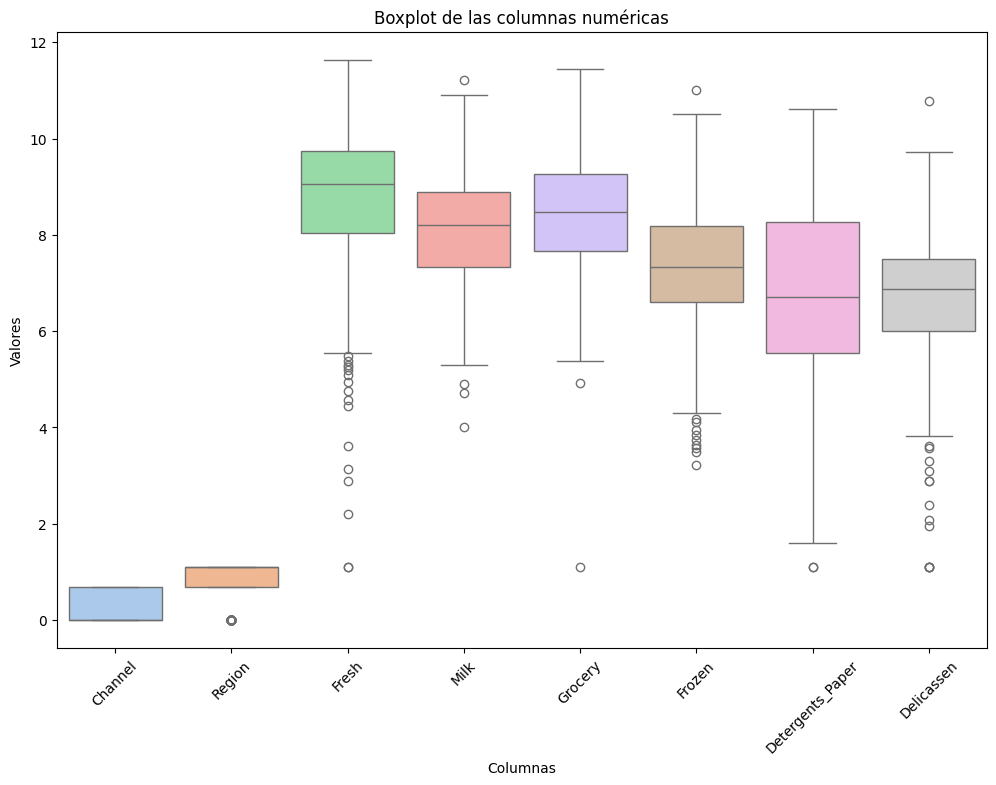

In [28]:
# Your code here
# Función para aplicar una transformación logarítmica
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN
# Limpiar outliers para cada columna
x_transformed = x.map(log_transfom_clean_)

print("DataFrame sin outliers:\n", x_transformed)

# Seleccionar solo las columnas numéricas
numeric_columns = x_transformed.select_dtypes(include='number')

# Crear un boxplot para cada columna numérica
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns, palette='pastel')

# Personalizar el gráfico
plt.title("Boxplot de las columnas numéricas")
plt.ylabel("Valores")
plt.xlabel("Columnas")
plt.xticks(rotation=45)  # Rotar los nombres de las columnas para facilitar lectura
plt.show()

In [29]:
# # Your code here
# # Función para aplicar una transformación logarítmica
# def log_transfom_clean_(x):
#     if np.isfinite(x) and x!=0:
#         return np.sqrt(x)
#     else:
#         return np.NAN
# # Limpiar outliers para cada columna
# x_transformed = x.map(log_transfom_clean_)

# print("DataFrame sin outliers:\n", x_transformed)

# # Seleccionar solo las columnas numéricas
# numeric_columns = x_transformed.select_dtypes(include='number')

# # Crear un boxplot para cada columna numérica
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=numeric_columns, palette='pastel')

# # Personalizar el gráfico
# plt.title("Boxplot de las columnas numéricas")
# plt.ylabel("Valores")
# plt.xlabel("Columnas")
# plt.xticks(rotation=45)  # Rotar los nombres de las columnas para facilitar lectura
# plt.show()

**Tus observaciones aquí**

+ Realizando la transformación logarítmica, la dispersión queda totalmente cambiada a la parte inferior del boxplot y con menos volumen de outliers.
+ Tener tantos outliers en la columna de Fresh, sigue llamando la atención, pero puede que aporte una distinción suficiente.
+ Cuando realizamos una transformación logarítmica los outliers aparecen por la parte inferior y con raíz cuadrada por encima.

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [30]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
print(scaler.fit_transform(x_transformed))
customers_scale = scaler.transform(x_transformed)

[[ 1.44865163  0.56589572  0.48456094 ... -1.50841768  0.6430006
   0.40768457]
 [ 1.44865163  0.56589572  0.08876643 ...  0.13468306  0.76412675
   0.62396715]
 [ 1.44865163  0.56589572  0.01768032 ...  0.37714691  0.80224343
   1.75841957]
 ...
 [ 1.44865163  0.56589572  0.57731479 ... -0.95197733  1.63994942
   0.66213078]
 [-0.69029709  0.56589572  0.343877   ... -0.27772612 -0.96681026
   0.76098885]
 [-0.69029709  0.56589572 -0.53965722 ... -2.43711211 -0.35976309
  -2.07271367]]


# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [31]:
from sklearn.cluster import KMeans

# Your code here:



### Viendo el elbow poddríamos escoger 2 como el número de clusters correctos

In [35]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

C:\Users\smont\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [36]:
x_transformed['Label'] = clusters

Cuenta los valores en `labels`.

In [37]:
# Your code here:
print(x_transformed['Label'].value_counts())

Label
1    286
0    154
Name: count, dtype: int64


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [38]:
from sklearn.cluster import DBSCAN 

# Your code here


Cuenta los valores en `labels_DBSCAN`.

In [39]:
# Your code here
X_scaled = x_transformed.drop(columns=['Label'])

dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

x_transformed['labels_DBSCAN'] = clusters

In [40]:
print(x_transformed['labels_DBSCAN'].value_counts())

labels_DBSCAN
 0    396
-1     44
Name: count, dtype: int64


# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [41]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

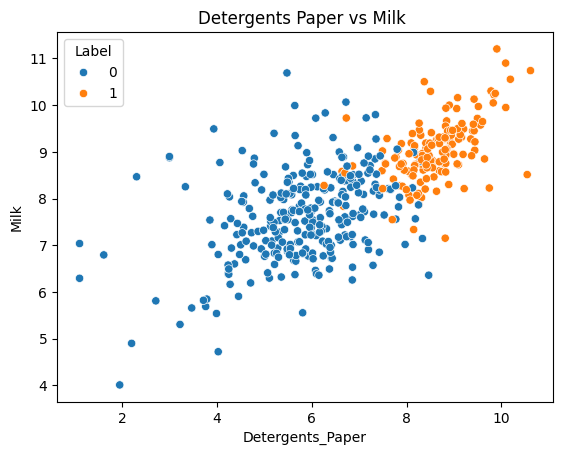

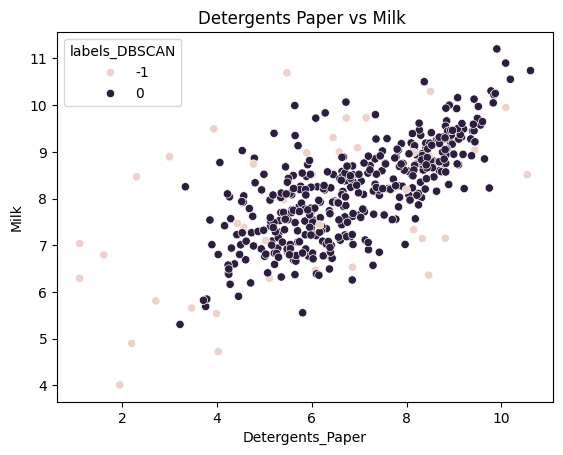

In [16]:
# Your code here:
plot(x_transformed.Detergents_Paper,x_transformed.Milk, x_transformed.Label)
plot(x_transformed.Detergents_Paper,x_transformed.Milk, x_transformed.labels_DBSCAN)

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

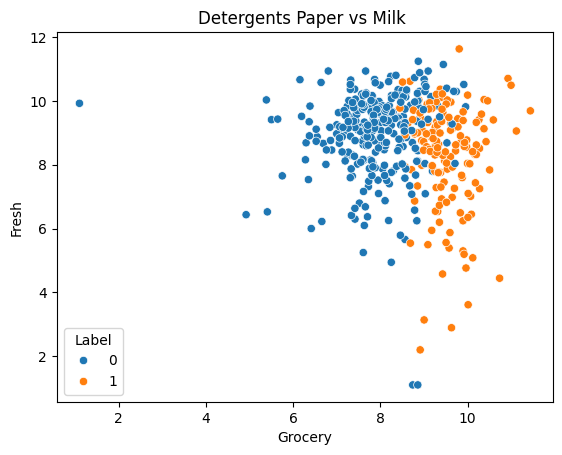

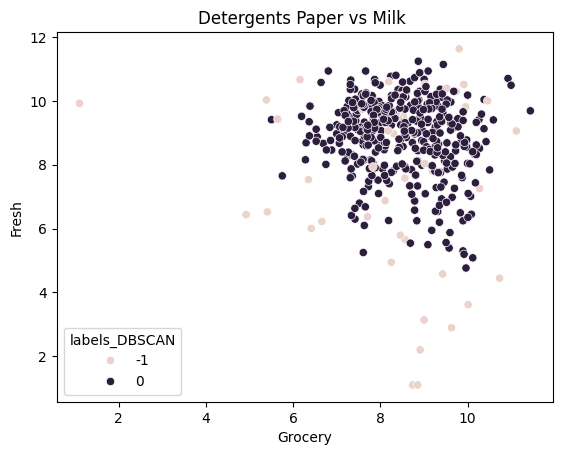

In [17]:
# Your code here:
plot(x_transformed.Grocery,x_transformed.Fresh, x_transformed.Label)
plot(x_transformed.Grocery,x_transformed.Fresh, x_transformed.labels_DBSCAN)

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

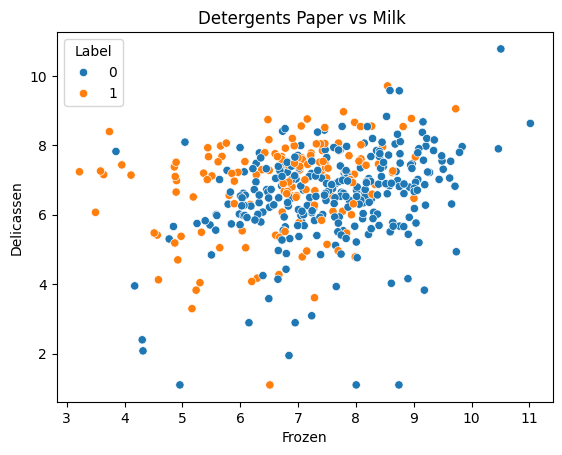

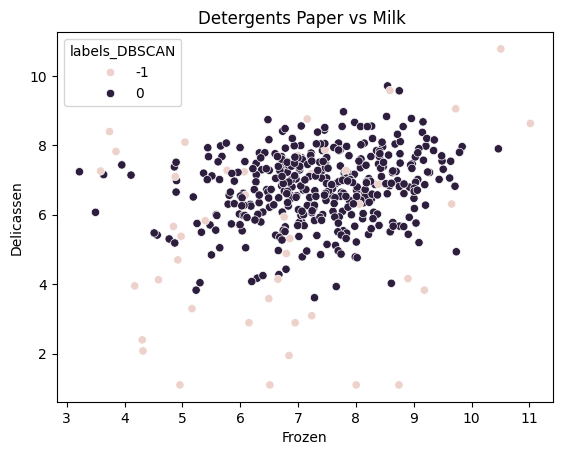

In [18]:
# Your code here:
plot(x_transformed.Frozen,x_transformed.Delicassen, x_transformed.Label)
plot(x_transformed.Frozen,x_transformed.Delicassen, x_transformed.labels_DBSCAN)

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [19]:
# Your code here:
x_transformed.groupby(['Label']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
Label,,,,,,,,,
0,0.004830,0.843279,8.969601,7.635791,7.874000,7.592376,5.817627,6.551154,-0.118467
1,0.634252,0.900121,8.282116,9.031298,9.505073,6.755570,8.602411,6.878938,-0.065359


In [20]:
x_transformed.groupby(['labels_DBSCAN']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
labels_DBSCAN,,,,,,,,,
-1,0.110273,0.921156,7.596332,7.768897,8.262639,6.621758,5.695758,5.468055,0.227273
0,0.236300,0.856587,8.856568,8.160175,8.461005,7.376911,6.907107,6.798142,0.361111


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...
Teniendo en cuenta las gráficas, podemos distinguir que hay 2 clusters con el método de K-Means, distinguible en la gráfica de forma sencilla aunque muy juntas. El DBSCAN mezcla hasta 3 clusters sin diferenciación cuando está ploteado. Dados los datos, entre los dos, apunto a K-Means como mejor resolvedor, aunque tengo la intuición de que se pueden tratar mejor los datos para obtener mejores clusters.

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [21]:
customers_scale

array([[ 1.44865163,  0.56589572,  0.48456094, ..., -1.50841768,
         0.6430006 ,  0.40768457],
       [ 1.44865163,  0.56589572,  0.08876643, ...,  0.13468306,
         0.76412675,  0.62396715],
       [ 1.44865163,  0.56589572,  0.01768032, ...,  0.37714691,
         0.80224343,  1.75841957],
       ...,
       [ 1.44865163,  0.56589572,  0.57731479, ..., -0.95197733,
         1.63994942,  0.66213078],
       [-0.69029709,  0.56589572,  0.343877  , ..., -0.27772612,
        -0.96681026,  0.76098885],
       [-0.69029709,  0.56589572, -0.53965722, ..., -2.43711211,
        -0.35976309, -2.07271367]])

C:\Users\smont\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


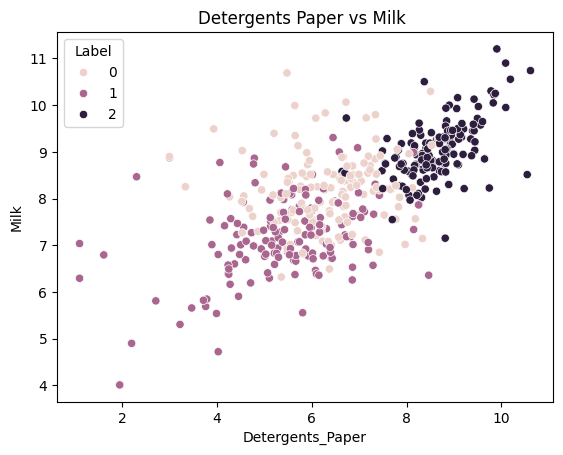

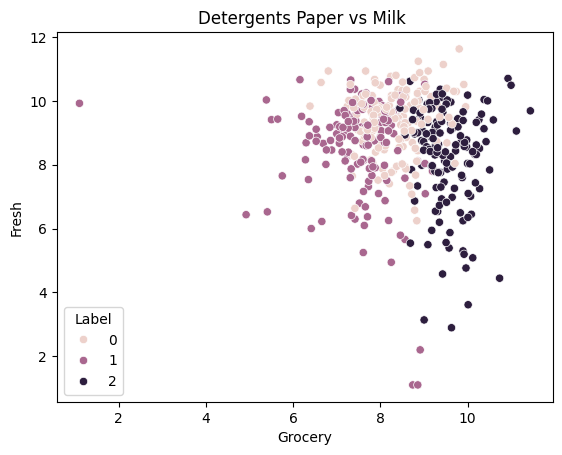

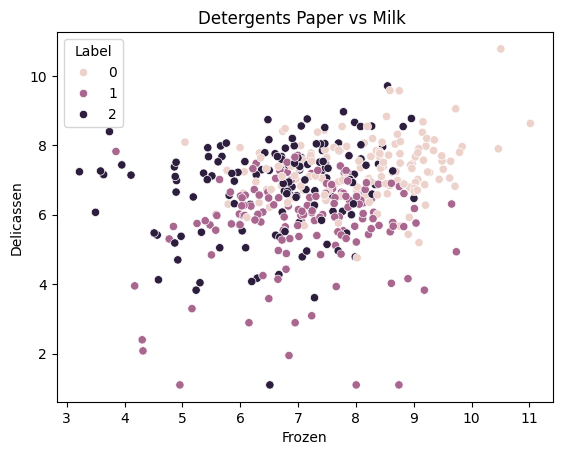

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2
...,...,...,...,...,...,...,...,...,...
435,0.000000,1.098612,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029,0
436,0.000000,1.098612,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467,0
437,0.693147,1.098612,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088,2
438,0.000000,1.098612,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527,1


In [50]:
# Your code here
xKM3 = x_transformed.drop(columns='labels_DBSCAN')

kmeans_4 = KMeans(n_clusters=3).fit(customers_scale)

labels = kmeans_4.predict(customers_scale)

clusters3 = kmeans_4.labels_.tolist()

xKM3['Label'] = clusters3

plot(xKM3.Detergents_Paper,xKM3.Milk, xKM3.Label)
plot(xKM3.Grocery,xKM3.Fresh, xKM3.Label)
plot(xKM3.Frozen,xKM3.Delicassen, xKM3.Label)

xKM3

**Tus observaciones aquí**

* Viendo los gráficos del k-means ... 3 clusters puede ser el límite aunque con mucho ruido.

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

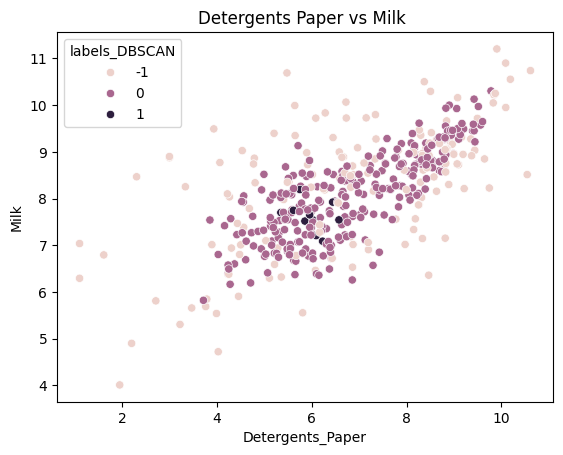

In [66]:
# Your code here
X_scaled = x_transformed.drop(columns=['Label'])

dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

x_transformed['labels_DBSCAN'] = clusters
plot(x_transformed.Detergents_Paper,x_transformed.Milk, x_transformed.labels_DBSCAN)

**Tus observaciones aquí**

    + El DBscan ajustado... en las imágenes que dispongo no puedo conseguir que trabaje adecuadamente.
    
